# Logistic Regression

### import liabraries

In [1]:
 import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import multilabel_confusion_matrix,accuracy_score,classification_report

## Problem Statement

## Data Gathering

In [3]:
df = pd.read_json(r"C:\Users\rohit\Desktop\datasets\iris.json")
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Data Analysis (EDA)

In [5]:
# check for size

df.shape

(150, 5)

In [6]:
# check for information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# statastical information

df.describe()

,sepalLength,sepalWidth,petalLength,petalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='sepalLength', ylabel='Density'>

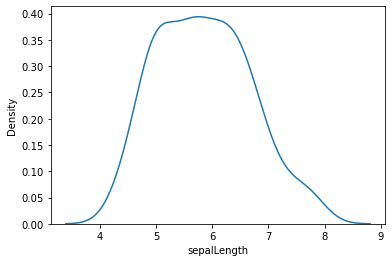

In [8]:
sns.kdeplot(df["sepalLength"])

<AxesSubplot:xlabel='sepalWidth', ylabel='Density'>

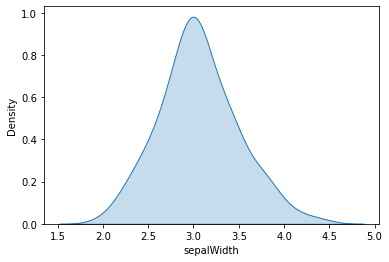

In [10]:
sns.kdeplot(df["sepalWidth"], fill= True)

<AxesSubplot:xlabel='petalLength', ylabel='Density'>

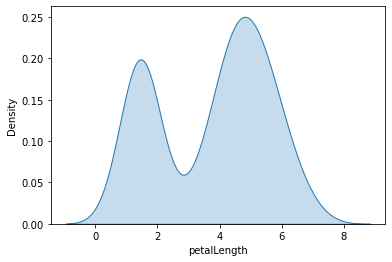

In [11]:
sns.kdeplot(df["petalLength"], fill= True)

<AxesSubplot:xlabel='petalWidth', ylabel='Count'>

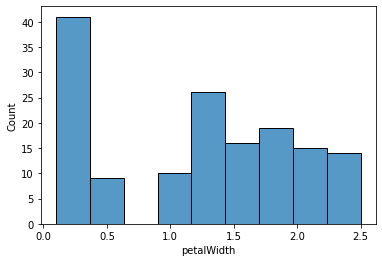

In [12]:
sns.histplot(df["petalWidth"])

<AxesSubplot:xlabel='petalWidth', ylabel='Density'>

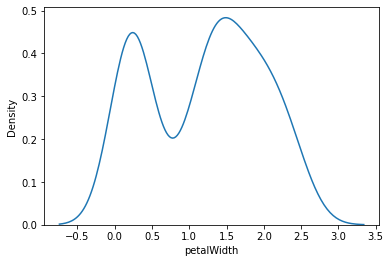

In [13]:
sns.kdeplot(df["petalWidth"])

In [14]:
# check for missing values

df.isnull().sum()

sepalLength    0
sepalWidth     0
petalLength    0
petalWidth     0
species        0
dtype: int64

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepalLength'>

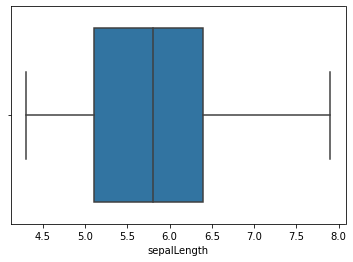

In [15]:
# check for outliers

sns.boxplot(df["sepalLength"])

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepalWidth'>

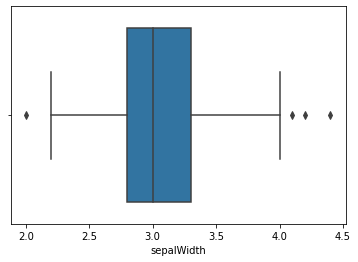

In [16]:
sns.boxplot(df["sepalWidth"])

In [17]:
q1 = df["sepalWidth"].quantile(0.25)
q2 = df["sepalWidth"].quantile(0.50)
q3 = df["sepalWidth"].quantile(0.75)

iqr = q3-q1

In [18]:
lowertail = q1 - 1.5*iqr
lowertail

2.05

In [19]:
uppertail = q3 + 1.5*iqr
uppertail

4.05

In [20]:
df[(df["sepalWidth"] < lowertail) | (df["sepalWidth"] > uppertail)]

,sepalLength,sepalWidth,petalLength,petalWidth,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [21]:
# target column
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Feature Engineering

In [22]:
df["species"].replace({'setosa':0, 'versicolor':1, 'virginica':2},inplace=True)

In [23]:
df

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepalLength  150 non-null    float64
 1   sepalWidth   150 non-null    float64
 2   petalLength  150 non-null    float64
 3   petalWidth   150 non-null    float64
 4   species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Assumption : No multicolinearity

In [29]:
vif_df = pd.DataFrame()

df1 = df.iloc[:,:4]

vif_df["Independant Variables"] = df1.columns

vif_df

,Independant Variables
0,sepalLength
1,sepalWidth
2,petalLength
3,petalWidth


In [30]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
    
vif_list

[262.9693482414677, 96.35329172369063, 172.96096155387588, 55.50205979323787]

In [31]:
vif_df["VIF"] = vif_list

In [32]:
vif_df

,Independant Variables,VIF
0,sepalLength,262.969348
1,sepalWidth,96.353292
2,petalLength,172.960962
3,petalWidth,55.502060


## Feature Selection

In [33]:
df.corr()

,sepalLength,sepalWidth,petalLength,petalWidth,species
sepalLength,1.000000,-0.117570,0.871754,0.817941,0.782561
sepalWidth,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petalLength,0.871754,-0.428440,1.000000,0.962865,0.949035
petalWidth,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

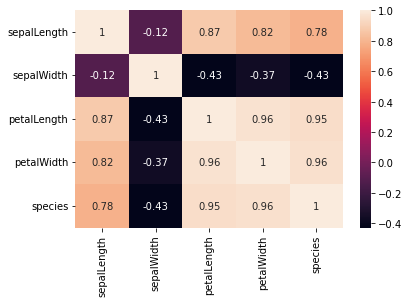

In [35]:
sns.heatmap(df.corr(), annot=True)

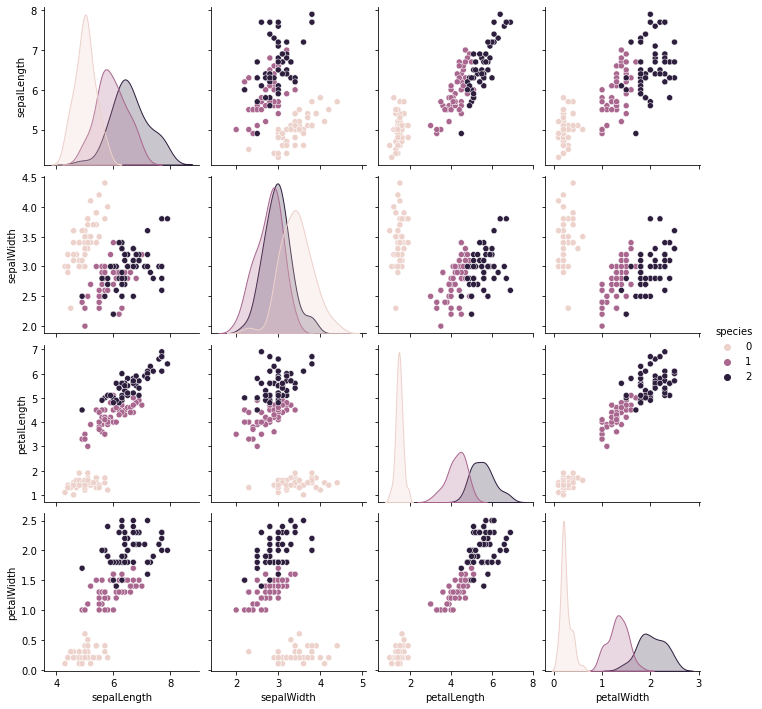

In [36]:
sns.pairplot(df,hue="species")

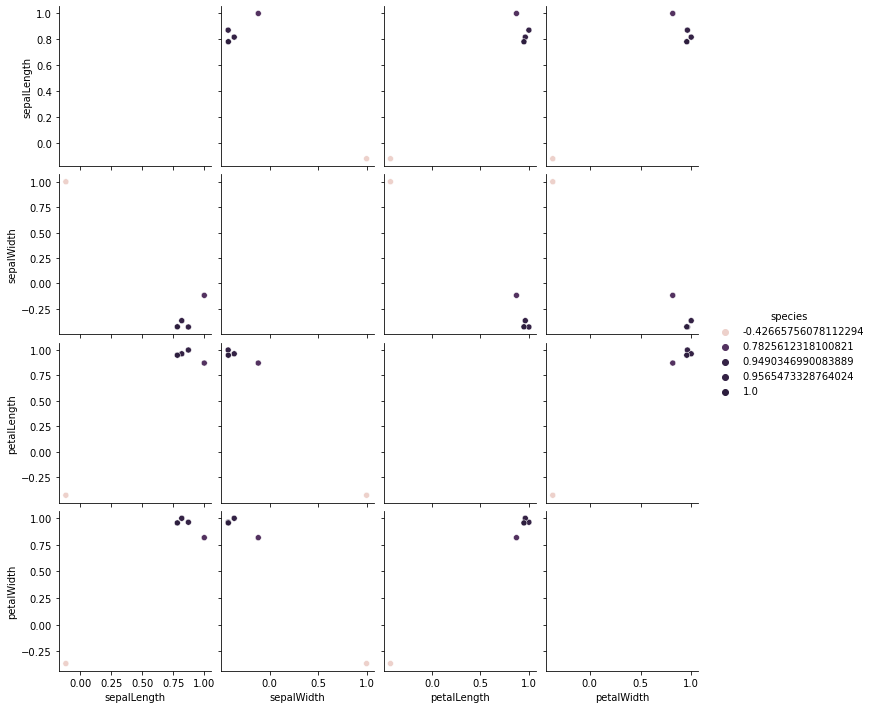

In [37]:
sns.pairplot(df.corr(),hue="species")

In [38]:
x = df1 #independant features
y = df["species"] #dependant features/target column

In [39]:
df["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

C:\Users\rohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

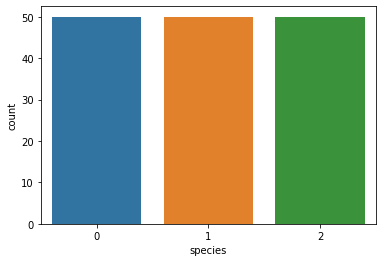

In [40]:
sns.countplot(df["species"])

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

## Model TRaining

In [44]:
log_reg = LogisticRegression(multi_class="ovr") # multi_class="ovr" : as it is multiclass
log_reg

LogisticRegression()

In [45]:
log_reg_model = log_reg.fit(xtrain,ytrain)
log_reg_model

LogisticRegression()

## Evaluation 

In [48]:
ytrain

137    2
93     1
1      0
99     1
12     0
      ..
14     0
85     1
70     1
23     0
144    2
Name: species, Length: 120, dtype: int64

In [47]:
ytrain_pred = log_reg_model.predict(xtrain)

In [49]:
ytrain_pred

array([2, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0,
       1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       0, 0, 1, 2, 0, 0, 1, 2, 0, 2], dtype=int64)

### Evaluation on training data

In [55]:
acc = accuracy_score(ytrain,ytrain_pred)
print("Accuracy : ", acc)

print("-"*50)

print(multilabel_confusion_matrix(ytrain,ytrain_pred))
print("-"*50)

clf_rep = classification_report(ytrain,ytrain_pred)
print(clf_rep)

Accuracy :  0.9833333333333333
--------------------------------------------------
[[[79  0]
  [ 0 41]]

 [[83  1]
  [ 1 35]]

 [[76  1]
  [ 1 42]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.97      0.97        36
           2       0.98      0.98      0.98        43

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### Evaluation for testing data

In [56]:
ytest_pred = log_reg_model.predict(xtest)

In [57]:
acc = accuracy_score(ytest,ytest_pred)
print("Accuracy : ", acc)

print("-"*50)

print(multilabel_confusion_matrix(ytest,ytest_pred))
print("-"*50)

clf_rep = classification_report(ytest,ytest_pred)
print(clf_rep)

Accuracy :  0.9333333333333333
--------------------------------------------------
[[[21  0]
  [ 0  9]]

 [[16  0]
  [ 2 12]]

 [[21  2]
  [ 0  7]]]
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92        14
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



## save model into pickle file

In [60]:
import pickle

In [63]:
with open("model.pkl","wb") as f:
    pickle.dump(log_reg_model,f)

### Take input from user

In [70]:
def species_prediction(sepalLength,sepalWidth,petalLength,petalWidth):
    test_df = pd.DataFrame({"sepalLength":[sepalLength],
                            "sepalWidth":[sepalWidth],
                            "petalLength":[petalLength],
                            "petalWidth":[petalWidth]})
    
    with open("model.pkl","rb") as f:
        final_model = pickle.load(f)
        
    prediction = final_model.predict(test_df)
    
    print(f"Species : {prediction[0]}")

In [71]:
species_prediction(5.1,3.5,1.4,0.2)

Species : 0


In [72]:
species_prediction(6.7,3.0,5.2,2.3)

Species : 2


In [73]:
species_prediction(6,8,7,4)

Species : 2
